# <center>`Fisher` Score - `Chisquare`  Test For Feature Selection</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('ggplot')
# sns.set_theme(style='whitegrid')
%matplotlib inline

Compute chi-squared stats between each non-negative feature and class.

- This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.
The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [35]:
import seaborn as sns

df=sns.load_dataset('titanic')
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

| Column      | Description                                                                                       |
|-------------|---------------------------------------------------------------------------------------------------|
| survived    | Indicates whether a passenger survived (1) or did not survive (0) the Titanic disaster.           |
| pclass      | Represents the passenger class or ticket class of a passenger (1st, 2nd, or 3rd class).            |
| sex         | Denotes the gender of a passenger (male or female).                                               |
| age         | Represents the age of a passenger.                                                                |
| sibsp       | Indicates the number of siblings or spouses accompanying a passenger aboard the Titanic.          |
| parch       | Represents the number of parents or children accompanying a passenger aboard the Titanic.          |
| fare        | Denotes the fare or price paid by a passenger for their ticket.                                   |
| embarked    | Represents the port or location where a passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton). |
| class       | Indicates the passenger class or ticket class, similar to the `pclass` column.                     |
| who         | Represents the category of a passenger (man, woman, or child) based on their age and gender.       |
| adult_male  | Indicates whether a passenger is an adult male (True) or not (False).                              |
| deck        | Represents the deck or level where a passenger's cabin is located on the Titanic.                  |
| embark_town | Denotes the name of the town or city where a passenger boarded the Titanic.                         |
| alive       | Indicates whether a passenger survived (yes) or did not survive (no) the Titanic disaster.         |
| alone       | Denotes whether a passenger was traveling alone (True) or with others (False).                     |


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [6]:
df['sex'] = np.where(df['sex']=="male", 1, 0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [7]:
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [8]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [9]:
### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True, 1, 0)

In [10]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [11]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [12]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [13]:
X_train['sex'].unique()

array([1, 0])

In [14]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [15]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue

In [22]:
import pandas as pd
from sklearn.feature_selection import chi2

f_scores, p_values = chi2(X_train, y_train)
print(f_scores, p_values)

p_values = pd.Series(p_values)
p_values.index = X_train.columns
print(p_values)

[65.67929505  7.55053653 10.88471585 21.97994154] [5.30603805e-16 5.99922095e-03 9.69610546e-04 2.75514881e-06]
sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64


In [23]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

### Observation
Sex Column is the most important column when compared to the output feature
Survived

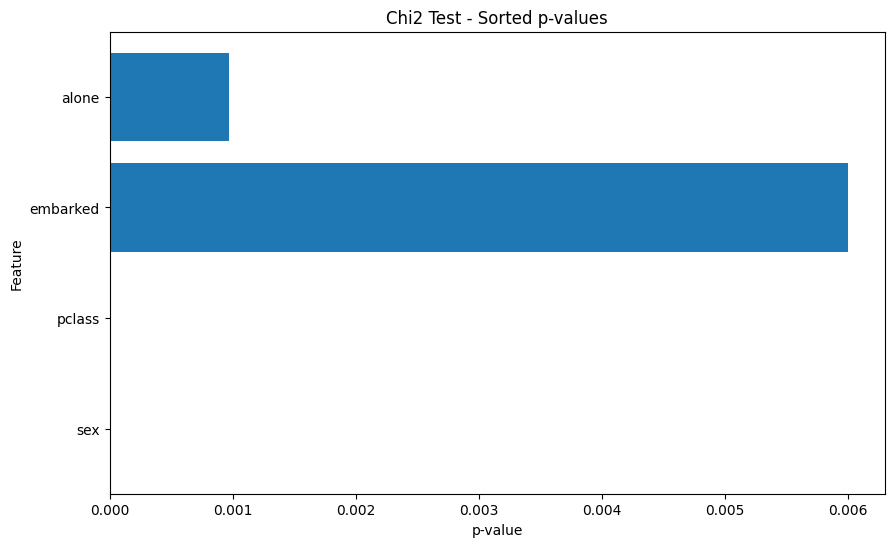

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2

# Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Select the relevant columns for feature selection
df = df[['sex', 'embarked', 'alone', 'pclass', 'survived']]

# Perform preprocessing
df['sex'] = np.where(df['sex'] == 'male', 1, 0)
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)
df['alone'] = np.where(df['alone'] == True, 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['sex', 'embarked', 'alone', 'pclass']], df['survived'], test_size=0.3, random_state=100)

# Perform chi2 test
f_scores, p_values = chi2(X_train, y_train)

# Create a Series to store the p-values and set the column names as index
p_values = pd.Series(p_values)
p_values.index = X_train.columns

# Sort the p-values in descending order
sorted_p_values = p_values.sort_index(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_p_values.index, sorted_p_values.values)
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.title('Chi2 Test - Sorted p-values')
plt.show()

**PreProcessing On complete dataset**

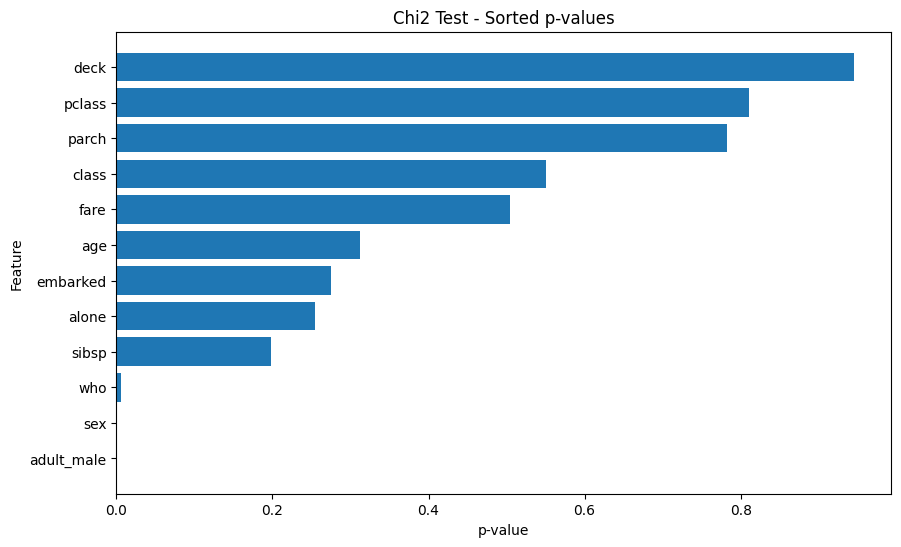

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.columns

# Drop columns with missing values
df = df.dropna()
df = df.drop(['embark_town', 'alive'], axis=1)

# Preprocessing using numpy
# df['sex'] = np.where(df['sex'] == "male", 1, 0)

# Columns to encode
columns_to_encode = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'alone']

# Creating the label encoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Normalize age and fare using MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# Split the data into training and testing sets
X = df.drop(labels='survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform chi2 test
f_scores, p_values = chi2(X_train, y_train)

# Create a Series to store the p-values and set the column names as index
p_values = pd.Series(p_values)
p_values.index = X_train.columns

# Sort the p-values in ascending order
# sorted_p_values = p_values.sort_index(ascending=True)
sorted_p_values = p_values.sort_values(ascending=True)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_p_values.index, sorted_p_values.values)
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.title('Chi2 Test - Sorted p-values')
plt.show()

on complete dataset

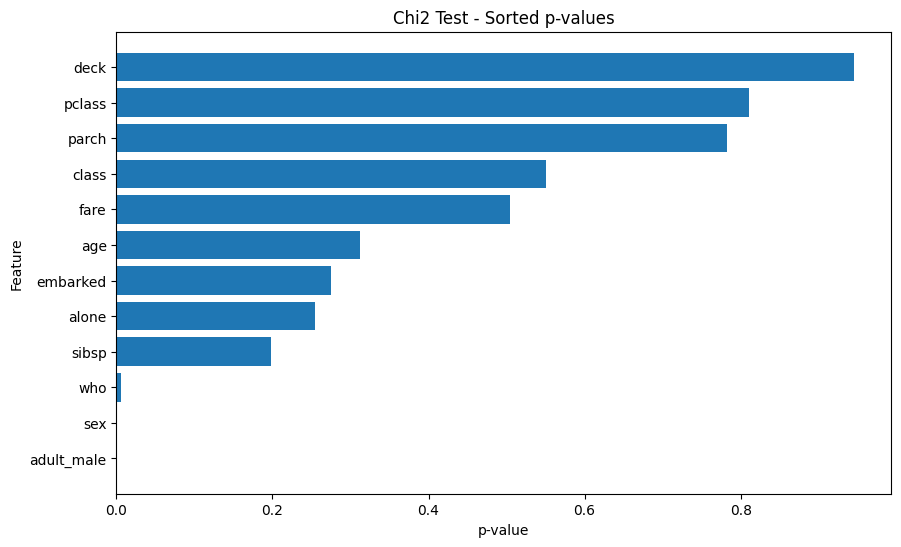

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.columns

# Drop columns with missing values
df = df.dropna()
df = df.drop(['embark_town', 'alive'], axis=1)

# Preprocessing using numpy
# df['sex'] = np.where(df['sex'] == "male", 1, 0)

# Columns to encode
columns_to_encode = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'alone']

# Creating the label encoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Normalize age and fare using MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# Split the data into training and testing sets
X = df.drop(labels='survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform chi2 test
f_scores, p_values = chi2(X, y)

# Create a Series to store the p-values and set the column names as index
p_values = pd.Series(p_values)
p_values.index = X_train.columns

# Sort the p-values in ascending order
# sorted_p_values = p_values.sort_index(ascending=True)
sorted_p_values = p_values.sort_values(ascending=True)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_p_values.index, sorted_p_values.values)
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.title('Chi2 Test - Sorted p-values')
plt.show()

without normaliszation

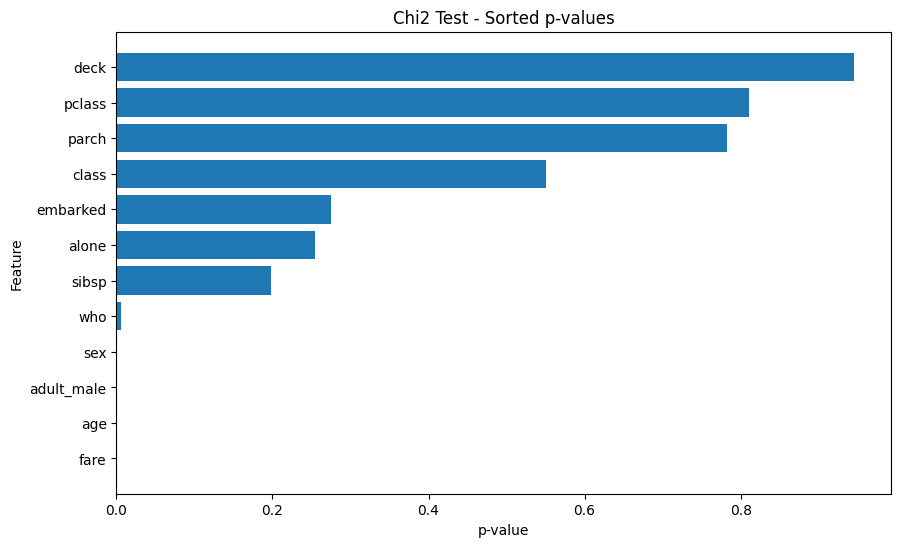

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.columns

# Drop columns with missing values
df = df.dropna()
df = df.drop(['embark_town', 'alive'], axis=1)

# Preprocessing using numpy
# df['sex'] = np.where(df['sex'] == "male", 1, 0)

# Columns to encode
columns_to_encode = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'alone']

# Creating the label encoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


# Split the data into training and testing sets
X = df.drop(labels='survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform chi2 test
f_scores, p_values = chi2(X, y)

# Create a Series to store the p-values and set the column names as index
p_values = pd.Series(p_values)
p_values.index = X_train.columns

# Sort the p-values in ascending order
# sorted_p_values = p_values.sort_index(ascending=True)
sorted_p_values = p_values.sort_values(ascending=True)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(sorted_p_values.index, sorted_p_values.values)
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.title('Chi2 Test - Sorted p-values')
plt.show()

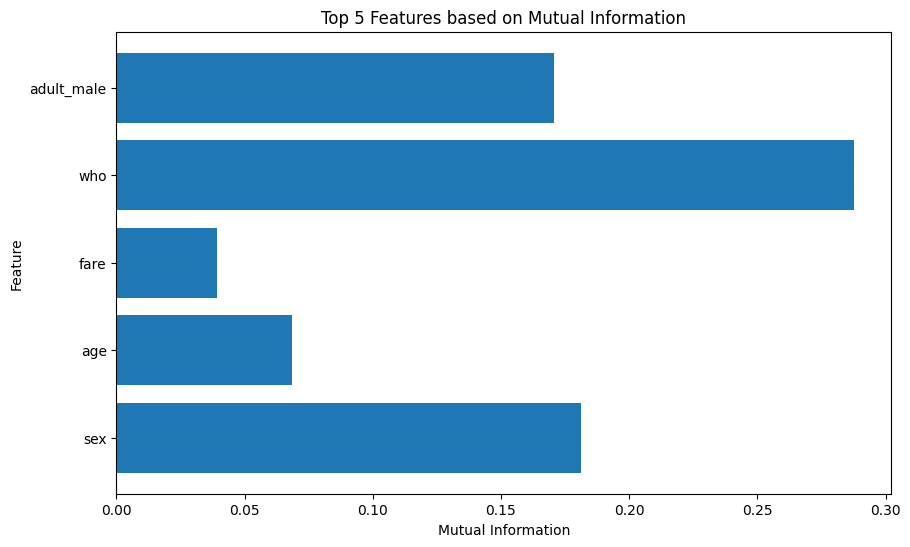

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.columns

# Drop columns with missing values
df = df.dropna()
df = df.drop(['embark_town', 'alive'], axis=1)

# Preprocessing using numpy
# df['sex'] = np.where(df['sex'] == "male", 1, 0)

# Columns to encode
columns_to_encode = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'alone']

# Creating the label encoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Normalize age and fare using MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])

# Split the data into training and testing sets
X = df.drop(labels='survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform mutual information classification
mutual_info = mutual_info_classif(X_train, y_train)

# Create a Series to store the mutual information scores and set the column names as index
mutual_info_scores = pd.Series(mutual_info)
mutual_info_scores.index = X_train.columns

# Sort the mutual information scores in descending order
sorted_mutual_info = mutual_info_scores.sort_values(ascending=False)

# Use SelectKBest to select the top k features based on mutual information
k = 5  # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(selected_features, sorted_mutual_info[selected_features])
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title(f'Top {k} Features based on Mutual Information')
plt.show()